In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns
import os
import numpy as np
from scipy import stats



In [2]:
# Data Merging


# Directory containing CSV files
input_directory = ("../Project_1/Resources_Input")
# Output file path
output_file = ("../Project_1/Resources_Output/Crypto_merged.csv")

# Get a list of all CSV files in the directory
csv_files = [f for f in os.listdir(input_directory) if f.endswith('.csv')]

# List to hold DataFrames
dataframes = []

# Read each CSV file into a DataFrame
for file in csv_files:
    file_path = os.path.join(input_directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames
merged_df = pd.concat(dataframes, ignore_index=True)

# Write the combined DataFrame to a new CSV file
merged_df.to_csv(output_file, index=False)


In [3]:
# Show First 5 lines for merged_df
merged_df.head()


,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,NEM,XEM,2015-04-02 23:59:59,0.000323,0.000227,0.000242,0.000314,28549.400391,2.823534e+06
1,2,NEM,XEM,2015-04-03 23:59:59,0.000330,0.000291,0.000309,0.000310,20677.900391,2.792457e+06
2,3,NEM,XEM,2015-04-04 23:59:59,0.000318,0.000251,0.000310,0.000277,23550.199219,2.488770e+06
3,4,NEM,XEM,2015-04-05 23:59:59,0.000283,0.000218,0.000272,0.000232,26800.199219,2.087388e+06
4,5,NEM,XEM,2015-04-06 23:59:59,0.000299,0.000229,0.000232,0.000289,22511.500000,2.598354e+06


In [4]:
# Create a clean_data_df to format the date to  datetime64[ns]
clean_data_df = pd.read_csv('../Project_1/Resources_Output/Crypto_merged.csv', parse_dates=['Date'])

In [5]:
# Show data types for clean_data
clean_data_df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [6]:
# Create a list and store the Crypto Currency in Target_Symbols
target_symbols = [ 'BTC','ETH', 'ADA','BNB','SOL','DOGE']

# Create a data frame to filter the Crypto Currency selected

filtered_df=clean_data_df[clean_data_df['Symbol'].isin(target_symbols)]
# Show Filtered Dataframe
filtered_df

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
7970,1,Binance Coin,BNB,2017-07-26 23:59:59,0.109013,0.099266,0.105893,0.105138,2.003950e+05,1.051380e+07
7971,2,Binance Coin,BNB,2017-07-27 23:59:59,0.108479,0.100888,0.105108,0.107737,3.444990e+05,1.077370e+07
7972,3,Binance Coin,BNB,2017-07-28 23:59:59,0.109019,0.101473,0.107632,0.104067,3.425680e+05,1.040670e+07
7973,4,Binance Coin,BNB,2017-07-29 23:59:59,0.111264,0.101108,0.104782,0.107811,3.402180e+05,1.078110e+07
7974,5,Binance Coin,BNB,2017-07-30 23:59:59,0.108138,0.103162,0.107935,0.106414,2.242610e+05,1.064140e+07
...,...,...,...,...,...,...,...,...,...,...
36189,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
36190,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
36191,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
36192,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


In [7]:
# Show data types for filtered_df
filtered_df.dtypes

SNo                   int64
Name                 object
Symbol               object
Date         datetime64[ns]
High                float64
Low                 float64
Open                float64
Close               float64
Volume              float64
Marketcap           float64
dtype: object

In [8]:
# Filter Doge coin data set

DOGE_df=filtered_df[filtered_df['Symbol'] == 'DOGE'].reset_index()
# Show dataframe DOGE
DOGE_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,33434,1,Dogecoin,DOGE,2013-12-16 23:59:59,0.000866,0.000150,0.000299,0.000205,0.000000e+00,1.509085e+06
1,33435,2,Dogecoin,DOGE,2013-12-17 23:59:59,0.000289,0.000116,0.000207,0.000269,0.000000e+00,2.169688e+06
2,33436,3,Dogecoin,DOGE,2013-12-18 23:59:59,0.000362,0.000205,0.000267,0.000362,0.000000e+00,3.188943e+06
3,33437,4,Dogecoin,DOGE,2013-12-19 23:59:59,0.001520,0.000328,0.000395,0.001162,0.000000e+00,1.115034e+07
4,33438,5,Dogecoin,DOGE,2013-12-20 23:59:59,0.001143,0.000662,0.001143,0.000704,0.000000e+00,7.284337e+06
...,...,...,...,...,...,...,...,...,...,...,...
2755,36189,2756,Dogecoin,DOGE,2021-07-02 23:59:59,0.247997,0.238848,0.243982,0.245264,1.321471e+09,3.194925e+10
2756,36190,2757,Dogecoin,DOGE,2021-07-03 23:59:59,0.250214,0.242454,0.245106,0.246411,9.170158e+08,3.210491e+10
2757,36191,2758,Dogecoin,DOGE,2021-07-04 23:59:59,0.252567,0.243425,0.246425,0.246483,9.735115e+08,3.211767e+10
2758,36192,2759,Dogecoin,DOGE,2021-07-05 23:59:59,0.246419,0.227838,0.246419,0.231614,1.267949e+09,3.018344e+10


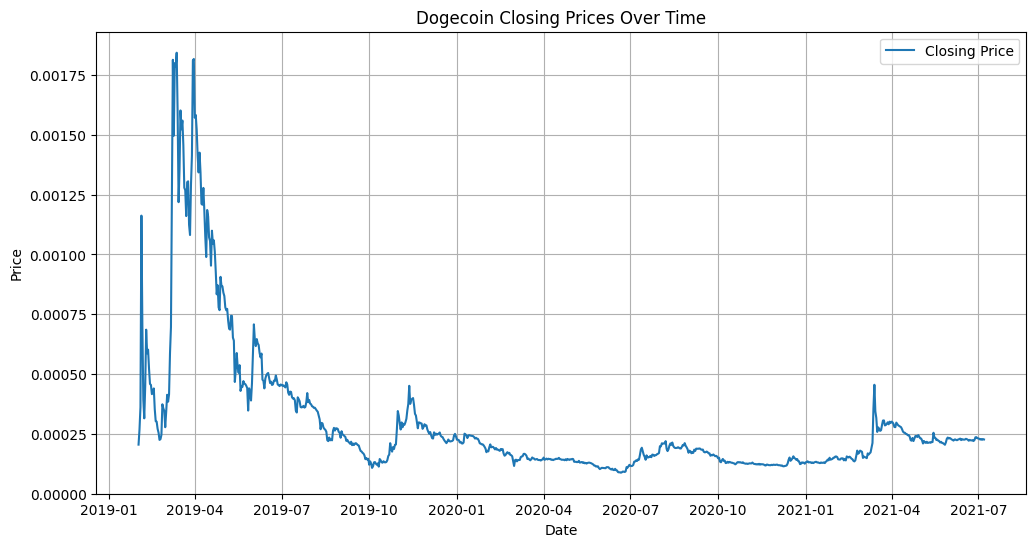

In [9]:
# Convert date column to datetime
DOGE_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
DOGE_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(DOGE_df['Close'], label='Closing Price')
plt.title('Dogecoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Filter Etherum data set

ETH_df=filtered_df[filtered_df['Symbol'] == 'ETH'].reset_index()
# Show dataframe ETH
ETH_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,26420,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,6.741880e+05,4.548689e+07
1,26421,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,5.321700e+05,4.239957e+07
2,26422,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,4.052830e+05,4.281836e+07
3,26423,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1.463100e+06,6.456929e+07
4,26424,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2.150620e+06,7.364501e+07
...,...,...,...,...,...,...,...,...,...,...,...
2155,28575,2156,Ethereum,ETH,2021-07-02 23:59:59,2155.596496,2021.824808,2109.892677,2150.040364,3.179621e+10,2.505527e+11
2156,28576,2157,Ethereum,ETH,2021-07-03 23:59:59,2237.567155,2117.590013,2150.835025,2226.114282,1.743336e+10,2.594475e+11
2157,28577,2158,Ethereum,ETH,2021-07-04 23:59:59,2384.286857,2190.837703,2226.550382,2321.724112,1.878711e+10,2.706217e+11
2158,28578,2159,Ethereum,ETH,2021-07-05 23:59:59,2321.922836,2163.041394,2321.922836,2198.582464,2.010379e+10,2.562978e+11


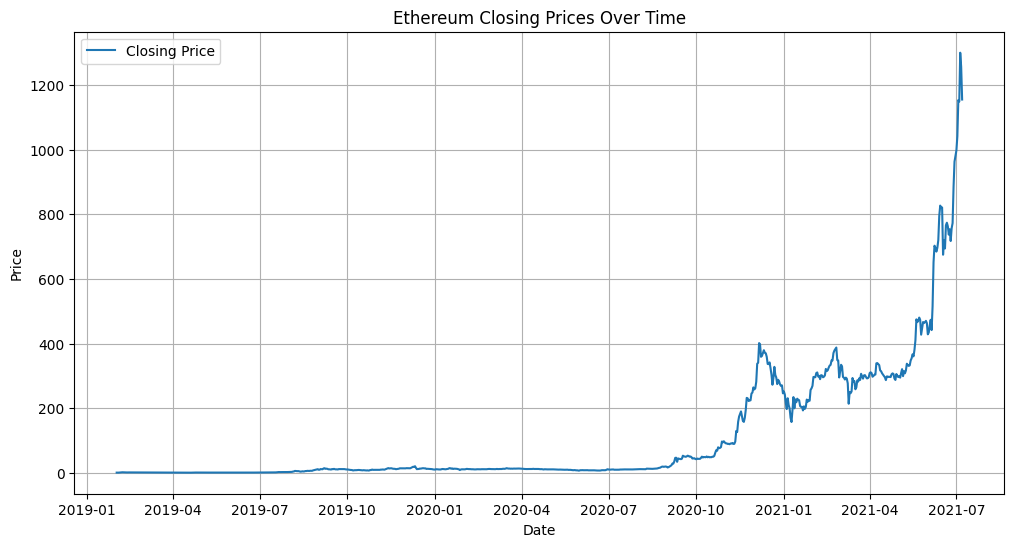

In [11]:
# Convert date column to datetime
ETH_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
ETH_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(ETH_df['Close'], label='Closing Price')
plt.title('Ethereum Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Filter Solana data set
SOL_df=filtered_df[filtered_df['Symbol'] == 'SOL'].reset_index()
# Show data frame Solana
SOL_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,11171,1,Solana,SOL,2020-04-11 23:59:59,1.049073,0.765020,0.951054,0.776819,4.386244e+07,0.000000e+00
1,11172,2,Solana,SOL,2020-04-12 23:59:59,0.956670,0.762426,0.785448,0.882507,3.873690e+07,0.000000e+00
2,11173,3,Solana,SOL,2020-04-13 23:59:59,0.891603,0.773976,0.890760,0.777832,1.821129e+07,0.000000e+00
3,11174,4,Solana,SOL,2020-04-14 23:59:59,0.796472,0.628169,0.777832,0.661925,1.674761e+07,0.000000e+00
4,11175,5,Solana,SOL,2020-04-15 23:59:59,0.704964,0.621531,0.669289,0.646651,1.307528e+07,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
447,11618,448,Solana,SOL,2021-07-02 23:59:59,34.031786,31.479924,33.306310,34.020482,4.402988e+08,9.275257e+09
448,11619,449,Solana,SOL,2021-07-03 23:59:59,35.404770,33.298475,34.015575,34.478816,3.270200e+08,9.400216e+09
449,11620,450,Solana,SOL,2021-07-04 23:59:59,35.502372,33.555737,34.495117,34.310601,3.034205e+08,9.354354e+09
450,11621,451,Solana,SOL,2021-07-05 23:59:59,34.461824,32.482692,34.282550,32.984588,3.138393e+08,8.992833e+09


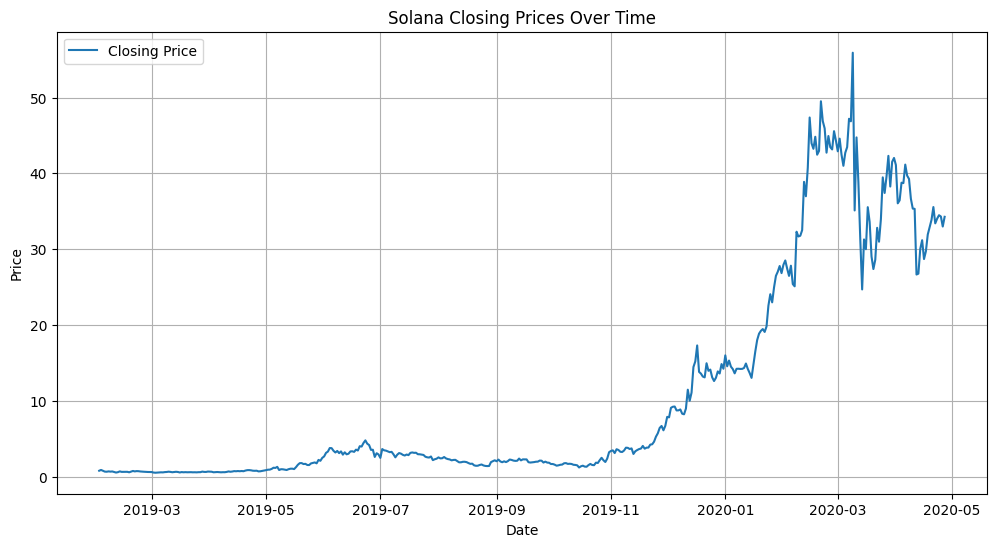

In [13]:
# Convert date column to datetime
SOL_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
SOL_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(SOL_df['Close'], label='Closing Price')
plt.title('Solana Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Filter Binance data set
BNB_df=filtered_df[filtered_df['Symbol'] == 'BNB'].reset_index()
Show BNB data frame
BNB_df

SyntaxError: invalid syntax (2904288375.py, line 3)

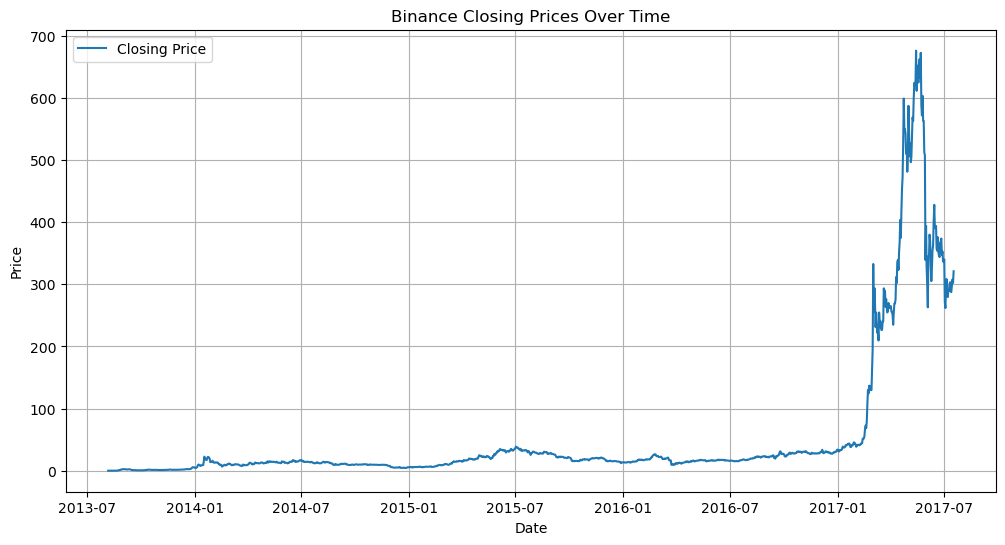

In [ ]:
# Convert date column to datetime
BNB_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BNB_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BNB_df['Close'], label='Closing Price')
plt.title('Binance Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter Binance data set
BTC_df=filtered_df[filtered_df['Symbol'] == 'BTC'].reset_index()
# Show BTC Data frame
BTC_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1717,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,1718,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,1719,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,1720,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,1721,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...,...
2986,4703,2987,Bitcoin,BTC,2021-07-02 23:59:59,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,4704,2988,Bitcoin,BTC,2021-07-03 23:59:59,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,4705,2989,Bitcoin,BTC,2021-07-04 23:59:59,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,4706,2990,Bitcoin,BTC,2021-07-05 23:59:59,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


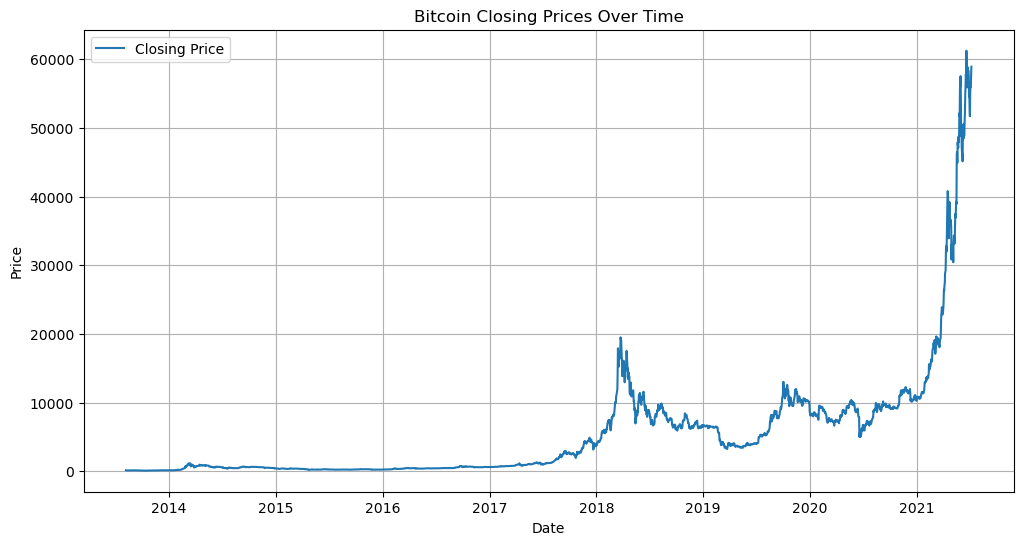

In [ ]:
# Convert date column to datetime
BTC_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
BTC_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(BTC_df['Close'], label='Closing Price')
plt.title('Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Filter Cardona data set
ADA_df=filtered_df[filtered_df['Symbol'] == 'ADA'].reset_index()
Show ADA dataframe
ADA_df

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,4708,1,Cardano,ADA,2017-10-02 23:59:59,0.030088,0.019969,0.024607,0.025932,5.764130e+07,6.288991e+08
1,4709,2,Cardano,ADA,2017-10-03 23:59:59,0.027425,0.020690,0.025757,0.020816,1.699780e+07,5.396927e+08
2,4710,3,Cardano,ADA,2017-10-04 23:59:59,0.022806,0.020864,0.020864,0.021931,9.000050e+06,5.686195e+08
3,4711,4,Cardano,ADA,2017-10-05 23:59:59,0.022154,0.020859,0.021951,0.021489,5.562510e+06,5.571390e+08
4,4712,5,Cardano,ADA,2017-10-06 23:59:59,0.021542,0.018360,0.021359,0.018539,7.780710e+06,4.806646e+08
...,...,...,...,...,...,...,...,...,...,...,...
1369,6077,1370,Cardano,ADA,2021-07-02 23:59:59,1.394397,1.286607,1.332942,1.394397,2.159410e+09,4.454587e+10
1370,6078,1371,Cardano,ADA,2021-07-03 23:59:59,1.441714,1.359664,1.394152,1.406836,2.028094e+09,4.494324e+10
1371,6079,1372,Cardano,ADA,2021-07-04 23:59:59,1.493717,1.382153,1.404008,1.458184,1.806362e+09,4.658364e+10
1372,6080,1373,Cardano,ADA,2021-07-05 23:59:59,1.461221,1.379284,1.461221,1.404898,1.759461e+09,4.488134e+10


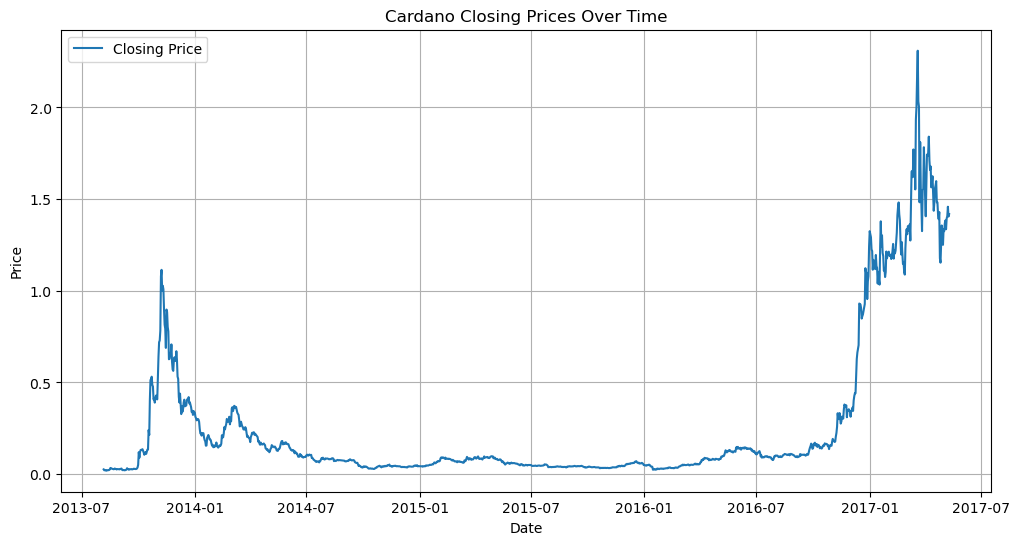

In [ ]:
# Convert date column to datetime
ADA_df['Date'] = pd.to_datetime(df['Date'])

# Set the date column as the index
ADA_df.set_index('Date', inplace=True)

# Plot closing prices
plt.figure(figsize=(12, 6))
plt.plot(ADA_df['Close'], label='Closing Price')
plt.title('Cardano Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Calculate mean median and volatility of DogeCoin
mean_price = DOGE_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = DOGE_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
DOGE_df = DOGE_df.sort_values(by='Date')

# Calculate daily returns
DOGE_df['return'] = DOGE_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = DOGE_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 0.013762639322080604
Median Price: 0.00184435040268945
Volatility: 0.11345836448299737


In [ ]:
#Calculate mean median and volatility of Ethereum
mean_price = ETH_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = ETH_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
ETH_df = ETH_df.sort_values(by='Date')

# Calculate daily returns
ETH_df['return'] = ETH_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = ETH_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 383.91069131936325
Median Price: 198.64369149700002
Volatility: 0.06303562022503241


In [ ]:
#Calculate mean median and volatility of Solana
mean_price = SOL_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = SOL_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
SOL_df = SOL_df.sort_values(by='Date')

# Calculate daily returns
SOL_df['return'] = SOL_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = SOL_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 10.471388329287931
Median Price: 2.8813885885149997
Volatility: 0.09450721975387637


In [ ]:
#Calculate mean median and volatility of Binance
mean_price = BNB_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = BNB_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
BNB_df = BNB_df.sort_values(by='Date')

# Calculate daily returns
BNB_df['return'] = BNB_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = BNB_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 52.250307521403116
Median Price: 16.21056933625
Volatility: 0.08004986863144231


In [ ]:
#Calculate mean median and volatility of Bit Coin
mean_price = BTC_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = BTC_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
BTC_df = BTC_df.sort_values(by='Date')

# Calculate daily returns
BTC_df['Return'] = BTC_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = BTC_df['Return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 6711.290443071488
Median Price: 2286.409912109375
Volatility: 0.04263924853868491


In [ ]:
#Calculate mean median and volatility of Cardona
mean_price = ADA_df['Close'].mean()
print(f"Mean Price: {mean_price}")


median_price = ADA_df['Close'].median()
print(f"Median Price: {median_price}")

# Ensure the data is sorted by date
ADA_df = ADA_df.sort_values(by='Date')

# Calculate daily returns
ADA_df['return'] = ADA_df['Close'].pct_change()

# Drop the NaN values that result from the pct_change operation
returns = ADA_df['return'].dropna()

# Calculate standard deviation of returns
volatility = returns.std()
print(f"Volatility: {volatility}")

Mean Price: 0.25631264836731377
Median Price: 0.08700221665815
Volatility: 0.0835979909649701


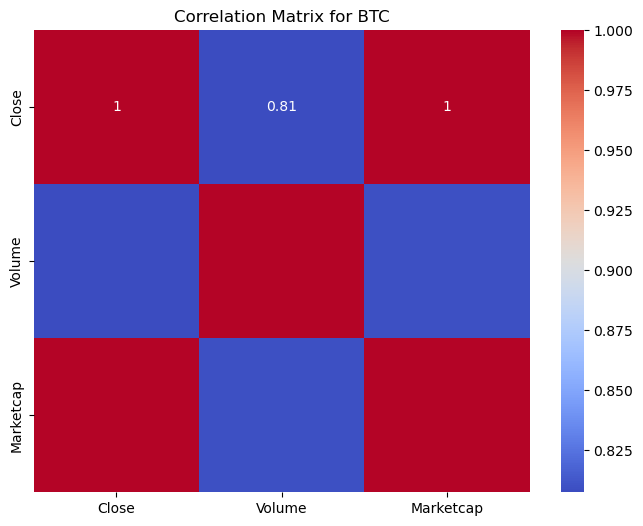

In [ ]:
# Filtered data for a specific cryptocurrency (e.g., Bitcoin)
BTC_df = filtered_df[filtered_df['Symbol'] == 'BTC']

# Calculate correlation matrix
correlation_matrix = BTC_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for BTC')
plt.show()

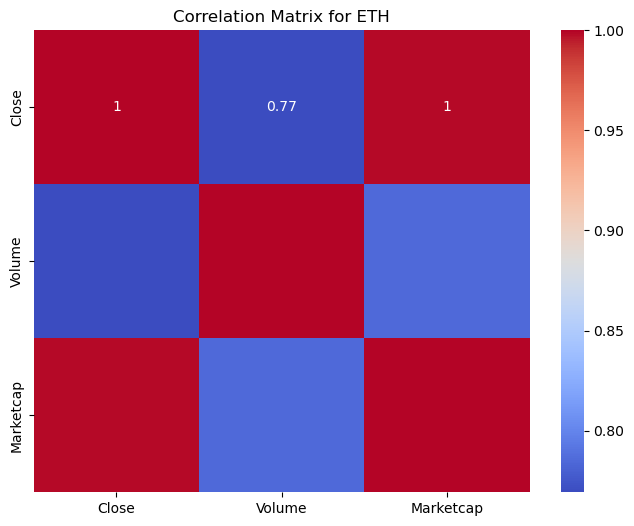

In [ ]:
# Filtered data for a specific cryptocurrency (e.g., Etheruem)
ETH_df = filtered_df[filtered_df['Symbol'] == 'ETH']

# Calculate correlation matrix
correlation_matrix = ETH_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for ETH')
plt.show()

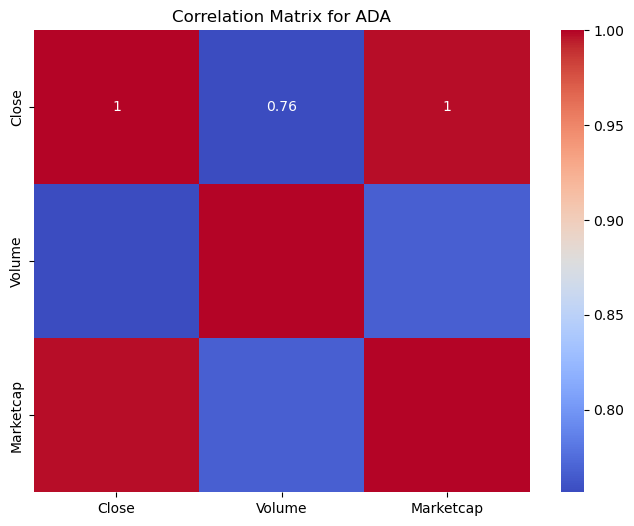

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. Cardano)
ADA_df = filtered_df[filtered_df['Symbol'] == 'ADA']

# Calculate correlation matrix
correlation_matrix = ADA_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for ADA')
plt.show()

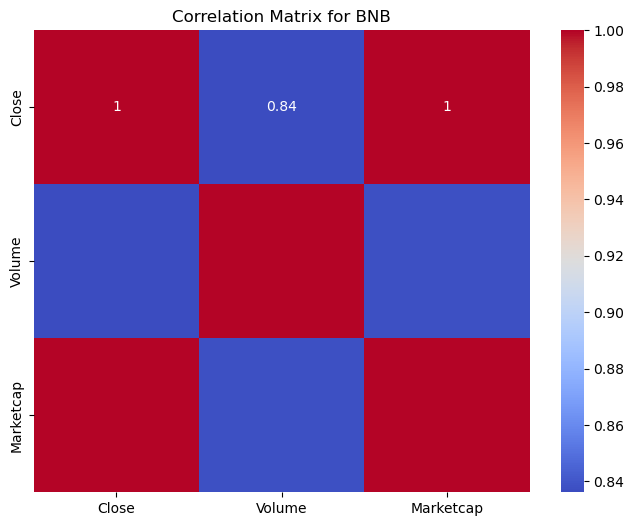

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. Binance)
BNB_df = filtered_df[filtered_df['Symbol'] == 'BNB']

# Calculate correlation matrix
correlation_matrix = BNB_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for BNB')
plt.show()

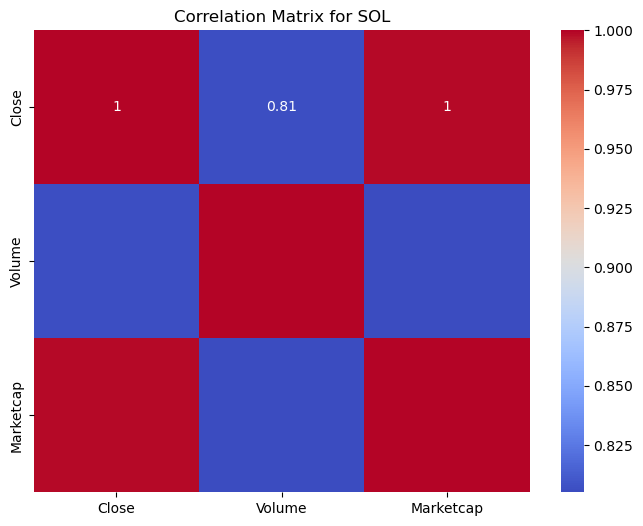

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. Solana)
SOL_df = filtered_df[filtered_df['Symbol'] == 'SOL']

# Calculate correlation matrix
correlation_matrix = SOL_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for SOL')
plt.show()

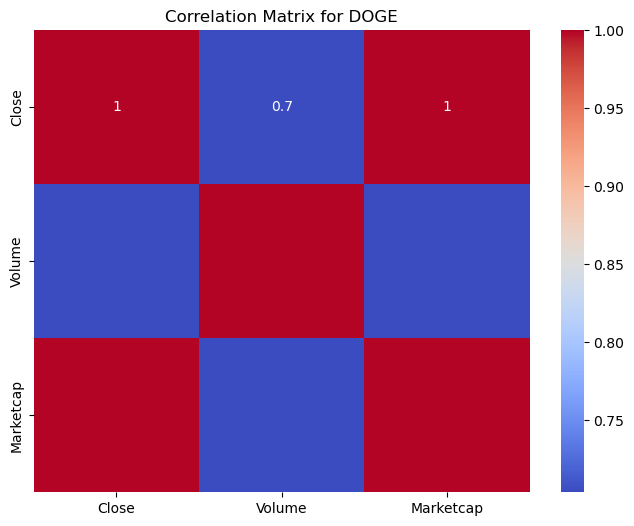

In [ ]:
# Filtered data for a specific cryptocurrency (e.g. DogeCoin)
DOGE_df = filtered_df[filtered_df['Symbol'] == 'DOGE']

# Calculate correlation matrix
correlation_matrix = DOGE_df[['Close', 'Volume', 'Marketcap']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for DOGE')
plt.show()

['BNB' 'BTC' 'ADA' 'DOGE' 'ETH' 'SOL']


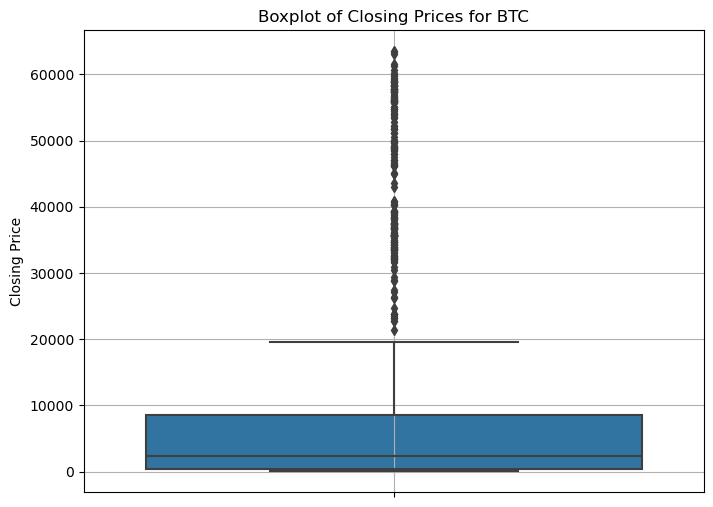

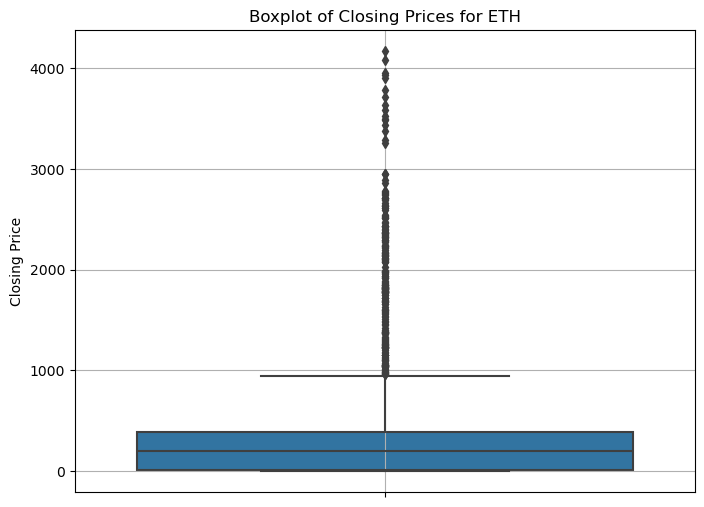

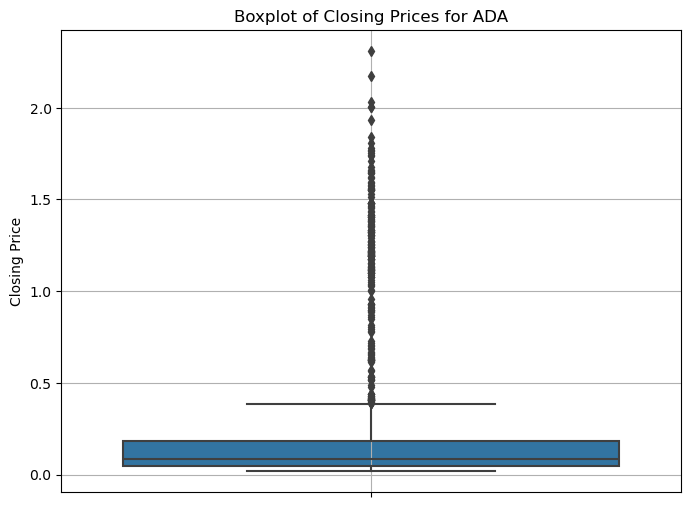

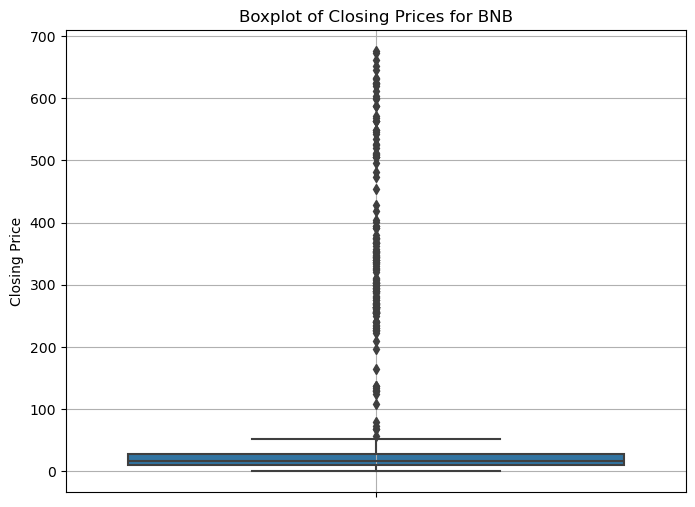

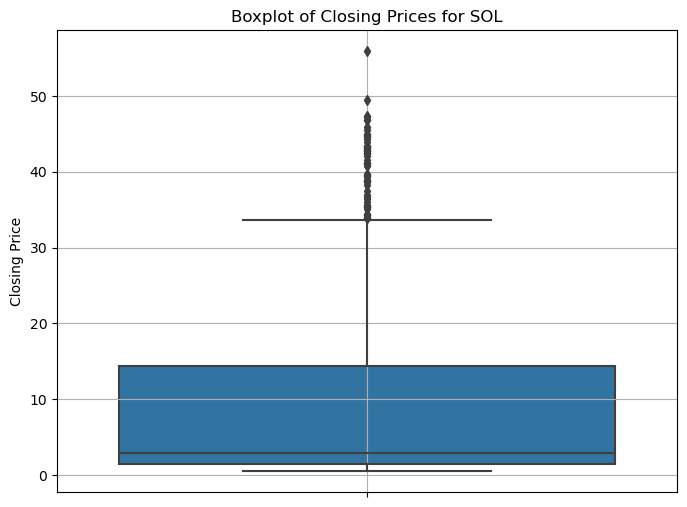

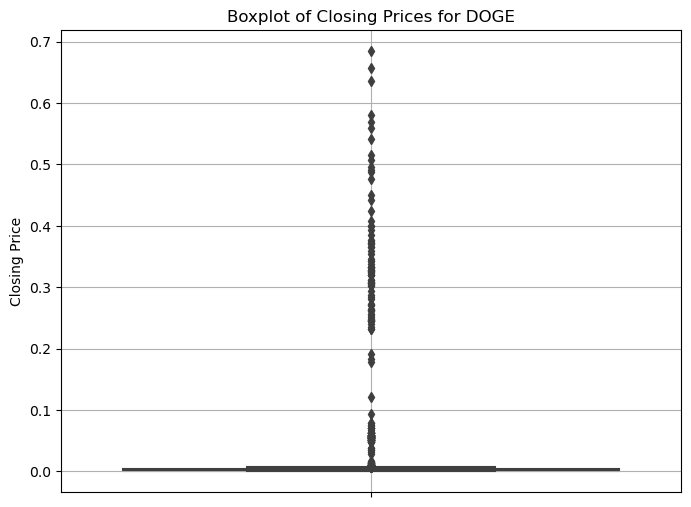

In [ ]:
# Load the correct dataset
crypto_data = pd.read_csv("../Project_1/Resources_Output/Crypto_merged.csv")
# Convert 'Date' column to datetime (if not already done)
crypto_data['Date'] = pd.to_datetime(crypto_data['Date'])
# Normalize symbol names to ensure consistency
crypto_data['Symbol'] = crypto_data['Symbol'].str.strip().str.upper()
# Define the target symbols
target_symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']
# Filter the DataFrame to include only the target symbols
filtered_df = crypto_data[crypto_data['Symbol'].isin(target_symbols)]
# Verify the unique symbols in the filtered DataFrame
print(filtered_df['Symbol'].unique())
# Loop through each cryptocurrency and create a boxplot
for symbol in target_symbols:
    # Filter data for the specific cryptocurrency
    symbol_df = filtered_df[filtered_df['Symbol'] == symbol]
    # Check if the symbol_df is not empty
    if not symbol_df.empty:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y='Close', data=symbol_df)
        plt.title(f'Boxplot of Closing Prices for {symbol}')
        plt.ylabel('Closing Price')
        plt.grid(True)
        plt.show()
    else:
        print(f"No data available for {symbol}")

In [ ]:
# Bonus # External event API
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Example API request (using NewsAPI)
api_key = 'your_api_key'
url = f'https://newsapi.org/v2/everything?q=Bitcoin&apiKey={api_key}'
response = requests.get(url)
articles = response.json()['articles']

# Extract headlines
headlines = [article['title'] for article in articles]

# Sentiment analysis
analyzer = SentimentIntensityAnalyzer()
sentiments = [analyzer.polarity_scores(headline)['compound'] for headline in headlines]

# Correlate sentiment with price
btc_df['Sentiment'] = sentiments  # Assuming you align dates correctly

In [ ]:
# Social Media Trends

# Fetch tweets using Twitter API (requires setup with credentials)
import tweepy

# Authenticate to Twitter
auth = tweepy.OAuthHandler("CONSUMER_KEY", "CONSUMER_SECRET")
auth.set_access_token("ACCESS_TOKEN", "ACCESS_SECRET")

# Create API object
api = tweepy.API(auth)

# Fetch tweets related to Bitcoin
tweets = api.search_tweets(q='Bitcoin', count=100)

# Perform sentiment analysis on tweets
tweet_sentiments = [analyzer.polarity_scores(tweet.text)['compound'] for tweet in tweets]

In [ ]:
# Combining Quantitative and Qualitative Analyses

from statsmodels.regression.linear_model import OLS

# Example: Combining volume and sentiment
BTC_df['Combined'] = BTC_df['Volume'] * BTC_df['Sentiment']

# Multivariate regression model
model = OLS(BTC_df['Close'], BTC_df[['Volume', 'Sentiment', 'Combined']])
results = model.fit()

# View results
print(results.summary())

In [16]:
#Independent Samples t-test for all pairs of the given cryptocurrencies: 'BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE'.
from scipy.stats import ttest_ind
import itertools

# Define the symbols for which we want to perform the t-test
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']

# Iterate over all pairs of symbols
for symbol1, symbol2 in itertools.combinations(symbols, 2):
    # Get closing prices for the two cryptocurrencies
    close1 = filtered_df[filtered_df['Symbol'] == symbol1]['Close']
    close2 = filtered_df[filtered_df['Symbol'] == symbol2]['Close']
    
    # Perform the independent samples t-test
    t_stat, p_value = ttest_ind(close1, close2, equal_var=False)
    
    print(f"T-test between {symbol1} and {symbol2}:")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
    
    # Interpretation
    if p_value < 0.05:
        print(f"There is a significant difference between the closing prices of {symbol1} and {symbol2}.\n")
    else:
        print(f"There is no significant difference between the closing prices of {symbol1} and {symbol2}.\n")

T-test between BTC and ETH:
T-statistic: 30.568608773691224
P-value: 5.427932998292799e-179
There is a significant difference between the closing prices of BTC and ETH.

T-test between BTC and ADA:
T-statistic: 32.48558018708678
P-value: 1.5504150386277179e-198
There is a significant difference between the closing prices of BTC and ADA.

T-test between BTC and BNB:
T-statistic: 32.23041042777768
P-value: 6.878024439775112e-196
There is a significant difference between the closing prices of BTC and BNB.

T-test between BTC and SOL:
T-statistic: 32.43596542298349
P-value: 5.0999887756100835e-198
There is a significant difference between the closing prices of BTC and SOL.

T-test between BTC and DOGE:
T-statistic: 32.48675432597838
P-value: 1.5072757926763687e-198
There is a significant difference between the closing prices of BTC and DOGE.

T-test between ETH and ADA:
T-statistic: 29.664394618350745
P-value: 1.6786324296681026e-162
There is a significant difference between the closing pr

In [18]:
#correlation analysis for all pairs of the given cryptocurrencies: 'BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE'
import itertools

# Define the symbols for which we want to perform the correlation analysis
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']

# Create an empty dictionary to store the correlation results
correlation_results = {}

# Iterate over all pairs of symbols
for symbol1, symbol2 in itertools.combinations(symbols, 2):
    # Get closing prices for the two cryptocurrencies
    close1 = filtered_df[filtered_df['Symbol'] == symbol1]['Close']
    close2 = filtered_df[filtered_df['Symbol'] == symbol2]['Close']
    
    # Calculate the Pearson correlation coefficient
    correlation = close1.corr(close2)
    
    # Store the result in the dictionary
    correlation_results[(symbol1, symbol2)] = correlation
    
    print(f"Correlation between {symbol1} and {symbol2}: {correlation:.4f}")
    
    # Interpretation
    if abs(correlation) > 0.7:
        print(f"Strong correlation between the closing prices of {symbol1} and {symbol2}.\n")
    elif abs(correlation) > 0.5:
        print(f"Moderate correlation between the closing prices of {symbol1} and {symbol2}.\n")
    else:
        print(f"Weak or no correlation between the closing prices of {symbol1} and {symbol2}.\n")

Correlation between BTC and ETH: nan
Weak or no correlation between the closing prices of BTC and ETH.

Correlation between BTC and ADA: nan
Weak or no correlation between the closing prices of BTC and ADA.

Correlation between BTC and BNB: nan
Weak or no correlation between the closing prices of BTC and BNB.

Correlation between BTC and SOL: nan
Weak or no correlation between the closing prices of BTC and SOL.

Correlation between BTC and DOGE: nan
Weak or no correlation between the closing prices of BTC and DOGE.

Correlation between ETH and ADA: nan
Weak or no correlation between the closing prices of ETH and ADA.

Correlation between ETH and BNB: nan
Weak or no correlation between the closing prices of ETH and BNB.

Correlation between ETH and SOL: nan
Weak or no correlation between the closing prices of ETH and SOL.

Correlation between ETH and DOGE: nan
Weak or no correlation between the closing prices of ETH and DOGE.

Correlation between ADA and BNB: nan
Weak or no correlation 

In [19]:

#ANOVA (Analysis of Variance) to compare the means of the closing prices across all 
# the given cryptocurrencies: 'BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE'.


from scipy.stats import f_oneway

# Define the symbols for which we want to perform ANOVA
symbols = ['BTC', 'ETH', 'ADA', 'BNB', 'SOL', 'DOGE']

# Create a list to hold the closing price data for each cryptocurrency
closing_prices = []

# Collect the closing prices for each cryptocurrency
for symbol in symbols:
    close_prices = filtered_df[filtered_df['Symbol'] == symbol]['Close']
    closing_prices.append(close_prices)
    
# Perform one-way ANOVA
f_stat, p_value = f_oneway(*closing_prices)

print("ANOVA Results:")
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in the mean closing prices between the cryptocurrencies.\n")
else:
    print("There is no significant difference in the mean closing prices between the cryptocurrencies.\n")

ANOVA Results:
F-statistic: 558.8760773539079
P-value: 0.0
There is a significant difference in the mean closing prices between the cryptocurrencies.



In [22]:
#Chi-Square Test of Independence
from scipy.stats import chi2_contingency

# Create a contingency table
# Example: Price increase or decrease vs. day of the week
filtered_df['Price_Change'] = filtered_df['Close'].diff().fillna(0)
filtered_df['Price_Direction'] = filtered_df['Price_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')

contingency_table = pd.crosstab(filtered_df['Price_Direction'], filtered_df['Date'].dt.day_name())

# Perform Chi-Square Test of Independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print("There is a significant relationship between price direction and day of the week.\n")
else:
    print("There is no significant relationship between price direction and day of the week.\n")

Chi-Square Test Results:
Chi-Square Statistic: 23.957583636661617
P-value: 0.0005317235834825665
There is a significant relationship between price direction and day of the week.



/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_97685/315617371.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Change'] = filtered_df['Close'].diff().fillna(0)
/var/folders/w1/qdc81k1s4v71sl9kx33yj1d40000gn/T/ipykernel_97685/315617371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Direction'] = filtered_df['Price_Change'].apply(lambda x: 'Increase' if x > 0 else 'Decrease')
